In [555]:
import numpy as np
import random
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
#     creating standard deck, a=1, j,q,k=10
deck=np.array([1,2,3,4,5,6,7,8,9,10,10,10,10])
goodCards=[1,7,8,9,10]
goodCardsForDealer=[1,7,10]

In [556]:
def getSoftCount(hardCount,aces):
    if hardCount<=11:
        return hardCount + 10*aces
    return hardCount 

def handleMoreThanTwoCards(hardCount,softCount,dealersFaceUpCard):
    if hardCount==softCount:
        if hardCount<=11 or (hardCount==12 and dealersFaceUpCard <=3) or dealersFaceUpCard in [1,7,8,9,10]:
            return 'Hit'
        return 'Stay'
    
    if softCount<=17:
        return 'Hit'

    if softCount==18 and dealersFaceUpCard in [1,9,10]:
        return 'Hit'
    return 'Stay'

def handleSameCards(hand,hardCount,softCount,dealersFaceUpCard,splitEights=True,splitFives=False):
    card= hand[0]
    if splitEights:
        if card==1 or (card==8 and dealersFaceUpCard!=1):
            return 'Split'
    
    if card in [2,3,7] and dealersFaceUpCard not in [1,8,9,10]:
        return 'Split'

    if card==6 and dealersFaceUpCard not in goodCards:
        return 'Split'
    
    if card==5 and splitFives:
        return 'Split'

    if card==4 and dealersFaceUpCard in [5,6]:
        return 'Split'
    return 'Hit'

def handleSameHardSoftHands(hand,hardCount,softCount,dealersFaceUpCard,hardElven=True):
    if hardElven and hardCount==11 and dealersFaceUpCard!=1:
        return 'Double'

    if hardCount==10 and dealersFaceUpCard not in [1,10]:
        return 'Double'

    if hardCount==9 and dealersFaceUpCard not in ([2]+ goodCards):
        return 'Double'

    if hardCount<=11:
        return 'Hit'

    if hardElven and hardCount==12 and dealersFaceUpCard <=3:
#         print("hard elvn on, hitting")
        return 'Hit'

    if dealersFaceUpCard in goodCards:
        return 'Hit'

    return 'Stay'

def handleRest(hand,hardCount,softCount,dealersFaceUpCard):
    if softCount==18:
        if dealersFaceUpCard not in ([2]+goodCards):
            return 'Double'

        if dealersFaceUpCard in [2,7,8]:
            return 'Stay'

    if softCount==17 and dealersFaceUpCard in [3,4,5,6]:
        return 'Double'

    if softCount in [15,16] and dealersFaceUpCard in [4,5,6]:
        return 'Double'

    if softCount in [13,14] and dealersFaceUpCard in [5,6]:
        return 'Double'

    return 'Hit'

def handleTwoCards(hand,hardCount,softCount,dealersFaceUpCard,hardElven,splitEights=True,splitFives=False):
    if hand[0]==hand[1]:
        return handleSameCards(hand,hardCount,softCount,dealersFaceUpCard,splitEights,splitFives)

    if hardCount==softCount:
        return handleSameHardSoftHands(hand,hardCount,softCount,dealersFaceUpCard,hardElven)
 
    return handleRest(hand,hardCount,softCount,dealersFaceUpCard)
        
    
def whatShouldIDo(hand, dealersFaceUpCard,hardElven=True,splitEights=True,splitFives=False):
    hardCount=sum(hand)
    noOfCards=len(hand)
    acesCount= 1*(1 in hand)
    softCount=getSoftCount(hardCount,acesCount)
    
    if noOfCards<2:
        return 'Not enough cards'

    if noOfCards==2 and softCount==21:
        return 'Jackpot!!! Dont forget to Tip'
    
    
    if softCount>=19 or hardCount>=17 :
        return 'Stay'
    
    if hand==[9,9] and dealersFaceUpCard not in goodCardsForDealer:
        return 'Split'
     
    if noOfCards>2:
        return handleMoreThanTwoCards(hardCount,softCount,dealersFaceUpCard)
    
    if noOfCards==2:
        return handleTwoCards(hand,hardCount,softCount,dealersFaceUpCard,hardElven,splitEights,splitFives)
        

In [557]:
#Test code 

assert whatShouldIDo([1,5], 1) == "Hit"
assert whatShouldIDo([2,5,3], 1) == "Hit"
assert whatShouldIDo([5,5,2], 1) == "Hit"
assert whatShouldIDo([2,8,4],5) =="Stay"

assert whatShouldIDo([8,8], 5) == "Split"
assert whatShouldIDo([5,5], 5) == "Hit"

In [558]:
def drawOpeningRound(handPlayer, cardCasino,hard_stay,deck):
    if handPlayer is None:
        handPlayer=[random.choice(deck), random.choice(deck)]
    
    #Turning on hard stay for split aces    
    if handPlayer==[1]:
        hard_stay==True
        
    #Adding a 2nd card to hand after splits    
    while len(handPlayer)<2:
        handPlayer.append(random.choice(deck))
        
    #Creating dealer card, and dealer cards
    if cardCasino is None:
        cardCasino=random.choice(deck)
    
    return handPlayer,cardCasino,hard_stay


def checkForDealerJackpot(casinoCards,bet):
    casinoCards.append(random.choice(deck))
    if 1 in (casinoCards):
#         print(casinoCards)
        if sum(casinoCards)==11:
            return 0
    return bet*1.5

def processSplit(bet, handPlayer, cardCasino, hard_code,hardElvn,splitEights,splitFives):
    if len(handPlayer)==2:     
        if handPlayer[0]==handPlayer[1]:
            res = play_blackjack(bet=bet, handPlayer=[handPlayer[0]], cardCasino=cardCasino, hard_code=hard_code,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)
            res+= play_blackjack(bet=bet, handPlayer=[handPlayer[0]], cardCasino=cardCasino, hard_code=hard_code,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)
            return res 
        else:
            return play_blackjack(bet=bet, handPlayer= handPlayer, cardCasino=cardCasino,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)
    else:
        return play_blackjack(bet=bet, handPlayer=handPlayer, cardCasino=cardCasino,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)
    
def playDealerRound(bet, handPlayer, cardCasino, hard_code,casinoCards):
    while True:
        #Plays out the blackjack hand from dealer's side
        #Give dealer extra card if loop hasn't broken
        casinoCards.append(random.choice(deck))


        #Keep track of sum of dealer's cards
#         print("in dealer cards",casinoCards)
        scoreCasino= sum(casinoCards)

        #Keep track of soft score if dealer has an ace

        scoreSoft= scoreCasino
        if scoreCasino<=11 and 1 in casinoCards:
            scoreSoft+=10

        #If dealer gets blackjack you lose even if you have 21
        if len(casinoCards)==2 and scoreSoft==21:
            return 0-bet

        #Keeps track of player's score     
        scorePlayer=sum(handPlayer)

        #Uses soft score if that is better for player
        if scorePlayer<=11 and 1 in handPlayer:
            scorePlayer+=10


        #Dealer stays on all 17s
        if scoreSoft>=17:

            #If dealer bust, player wins bet
            if scoreSoft>21 or scorePlayer>scoreSoft:
                return bet

            #Tie means no money changes hands
            if scorePlayer==scoreSoft:
                return 0

            #If player has lower, player loses bet
            if scorePlayer<scoreSoft:
                return 0 - bet

def handleSecondHandOnwards(bet, handPlayer, cardCasino, hard_code,hardElvn,splitEights,splitFives):
    if hard_code=='Hit':
        handPlayer.append(random.choice(deck))
        return play_blackjack(bet, handPlayer, cardCasino, hard_code= None,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)

    if hard_code=='Double':
        if len(handPlayer)==2:
            handPlayer.append(random.choice(deck))
            bet= bet*2
            if sum(handPlayer)>21:
                return 0 - bet
        else:
            return 'Double Not Possible'

    if hard_code=='Split':
        processSplit(bet, handPlayer, cardCasino, hard_code,hardElvn,splitEights,splitFives)

def handleFirstRound(bet, handPlayer, cardCasino, hard_code,casinoCards,hardElvn,splitEights,splitFives):
#     print("handPlayer:", handPlayer)
#     print("cardCasino:", cardCasino)
#     print("hard_code:", hard_code)
#     print("what should i do:", whatShouldIDo(handPlayer, cardCasino))
    while whatShouldIDo(handPlayer, cardCasino,hardElvn,splitEights,splitFives) == 'Hit':
        #Adding one card for every hit
        handPlayer.append(random.choice(deck))
#         print("what should i do after hit:", whatShouldIDo(handPlayer, cardCasino))
#         print(handPlayer)
        #Player loses bet if hand goes above 21
        if sum(handPlayer)>21:
            return 0- bet

        
        
        #If player Doubles

    if whatShouldIDo(handPlayer, cardCasino,hardElvn,splitEights,splitFives)=='Double':
        #He gets exactly one extra card and the bet size is doubled
        handPlayer.append(random.choice(deck))
        bet= bet * 2
        if sum(handPlayer)>21:
            return 0- bet

        #If player Splits

    if whatShouldIDo(handPlayer, cardCasino,hardElvn,splitEights,splitFives)== 'Split':
        #Runs the sim twice, as different hands, slightly less variance than real life, but it's okay
        res= play_blackjack(bet=bet, handPlayer=[handPlayer[0]], cardCasino=cardCasino,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives) 
        res+= play_blackjack(bet=bet, handPlayer=[handPlayer[0]], cardCasino=cardCasino,hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)
        return res
    
    return playDealerRound(bet, handPlayer, cardCasino, hard_code,casinoCards)


    
def play_blackjack(bet=10, handPlayer=None, cardCasino=None, hard_code= None,hardElvn=True,splitEights=True,splitFives=False):    
    hard_stay=False
    handPlayer,cardCasino,hard_stay=drawOpeningRound(handPlayer, cardCasino,hard_stay,deck)
    casinoCards=[cardCasino]
    
    
    #If hard stay condition is false
    if hard_stay==False:
        
        #Seeing if player hit blackjack
        if whatShouldIDo(handPlayer, cardCasino,hardElvn,splitEights,splitFives) == 'Jackpot!!! Dont forget to Tip':
            return checkForDealerJackpot(casinoCards,bet)
        
        if hard_code is not None:
#             print("in second round")
            return handleSecondHandOnwards(bet, handPlayer, cardCasino, hard_code,hardElvn,splitEights,splitFives)
        else:
#             print("in first round")
            return handleFirstRound(bet, handPlayer, cardCasino, hard_code,casinoCards,hardElvn,splitEights,splitFives)

    
    if hard_stay==True:
        
        return playDealerRound(bet, handPlayer, cardCasino, hard_code,casinoCards)
           

In [559]:
def testSimulationOfBlackJack(rounds=1000, player_hand=None, dealer_card=None, bet=10, hard_c=4,hardElvn=True,splitEights=True,splitFives=False):
    overAllOutcome=0
    res=[]
    for i in range(rounds):
        overAllOutcome+= play_blackjack(bet=bet, handPlayer=player_hand, cardCasino=dealer_card, hardElvn=hardElvn,splitEights=splitEights,splitFives=splitFives)
    return overAllOutcome

In [560]:
def simulateBlackJack(n_hands=50_000, bet=10, hard_c=4,hardElvn=True):
    pnl=0
    for i in range(n_hands):
        pnl+= play_blackjack(bet=bet,hardElvn=hardElvn)
        
    return pnl

<AxesSubplot:xlabel='Type', ylabel='Score'>

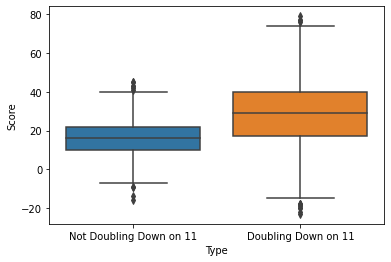

In [561]:
df = pd.DataFrame(columns=['Type','Score'])

for i in range(1,1000):
    withoutElvn = testSimulationOfBlackJack(n_hands=100,player_h=[6,5],dealer_c=None, bet=1, hardElvn=False)
    withElvn = testSimulationOfBlackJack(n_hands=100,player_h=[6,5],dealer_c=None, bet=1, hardElvn=True)
    df2=pd.DataFrame({"Type":["Doubling Down on 11"],
                    "Score":[withElvn]})
    df3=pd.DataFrame({"Type":["Not Doubling Down on 11"],
                    "Score":[withoutElvn]})
    df=df.append(df3)
    df=df.append(df2)

import seaborn as sns
sns.boxplot(x=df["Type"], y=df["Score"])


<AxesSubplot:xlabel='Type', ylabel='Score'>

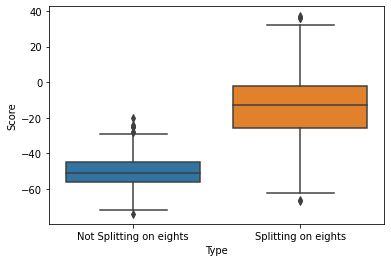

In [562]:
df = pd.DataFrame(columns=['Type','Score'])

for i in range(1,1000):
    withoutSplits = testSimulationOfBlackJack(n_hands=100,player_h=[8,8],dealer_c=None, bet=1, splitEights=False)
    withSplits = testSimulationOfBlackJack(n_hands=100,player_h=[8,8],dealer_c=None, bet=1, splitEights=True)
    df2=pd.DataFrame({"Type":["Splitting on eights"],
                    "Score":[withSplits]})
    df3=pd.DataFrame({"Type":["Not Splitting on eights"],
                    "Score":[withoutSplits]})
    df=df.append(df3)
    df=df.append(df2)

import seaborn as sns
sns.boxplot(x=df["Type"], y=df["Score"])

<AxesSubplot:xlabel='Type', ylabel='Score'>

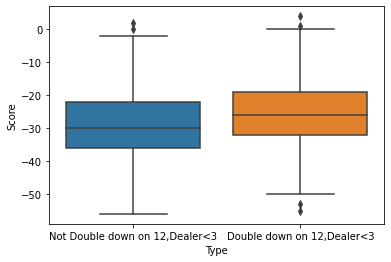

In [569]:
df = pd.DataFrame(columns=['Type','Score'])

for i in range(1,1000):
    withoutDoubleDownOn12 = testSimulationOfBlackJack(n_hands=100,player_h=[5,7],dealer_c=2, bet=1, hardElvn=False)
    withDoubleDownOn12 = testSimulationOfBlackJack(n_hands=100,player_h=[5,7],dealer_c=2, bet=1, hardElvn=True)
    df2=pd.DataFrame({"Type":["Double down on 12,Dealer<3"],
                    "Score":[withDoubleDownOn12]})
    df3=pd.DataFrame({"Type":["Not Double down on 12,Dealer<3"],
                    "Score":[withoutDoubleDownOn12]})
    df=df.append(df3)
    df=df.append(df2)

import seaborn as sns
sns.boxplot(x=df["Type"], y=df["Score"])

<AxesSubplot:xlabel='Type', ylabel='Score'>

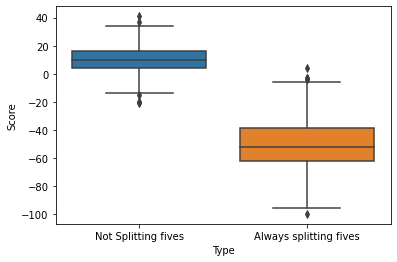

In [564]:
df = pd.DataFrame(columns=['Type','Score'])

for i in range(1,1000):
    notSplitting5 = testSimulationOfBlackJack(n_hands=100,player_h=[5,5],dealer_c=None, bet=1, splitFives=False)
    splitting5 = testSimulationOfBlackJack(n_hands=100,player_h=[5,5],dealer_c=None, bet=1, splitFives=True)
    df2=pd.DataFrame({"Type":["Always splitting fives"],
                    "Score":[splitting5]})
    df3=pd.DataFrame({"Type":["Not Splitting fives"],
                    "Score":[notSplitting5]})
    df=df.append(df3)
    df=df.append(df2)

import seaborn as sns
sns.boxplot(x=df["Type"], y=df["Score"])

In [565]:
house_edge=-100*(simulateBlackJack(n_hands=1_000_000, bet=1) / 1_000_000)
house_edge #percentage

0.1843

In [570]:
earnings=simulateBlackJack(n_hands=1_000_000, bet=1)
earnings
                           

-1678.5

In [567]:
earnings=simulateBlackJack(n_hands=1_000_000, bet=1,hardElvn=False)
earnings

-9199.0